In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
tf.get_logger().setLevel('ERROR')                                  # This is to suppress the tensorflow warnings

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [3]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


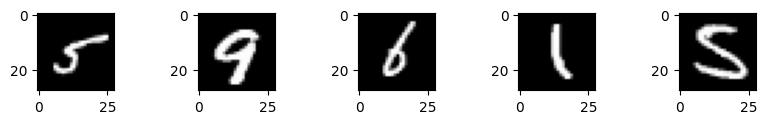

In [5]:
plt.figure(figsize=(10, 1))
for i in range(5):
    rand_indx = np.random.randint(1000)
    plt.subplot(1,5,i+1)
    plt.imshow(x_train[rand_indx],cmap = 'gray')

In [6]:
x_train_og = x_train
x_test_og = x_test

x_train = x_train / 255
x_test = x_test / 255

In [7]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [8]:
model.compile(optimizer = 'adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:
model.fit(x_train,y_train)

1875/1875 [==============================] - 7s 3ms/step - loss: 0.2745 - accuracy: 0.9197


In [10]:
predictions = model.predict(x_test[25:35])

1/1 [==============================] - 0s 288ms/step


In [11]:
predicted_labels = [tf.argmax(pred).numpy() for pred in predictions]

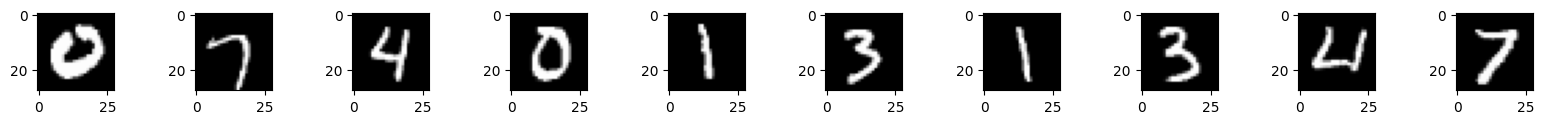

In [12]:
plt.figure(figsize=(20, 1))
for i,j in enumerate(range(25,35)):
    plt.subplot(1,10,i+1)
    plt.imshow(x_test[j],cmap = 'gray')

In [13]:
print(predicted_labels)

[0, 7, 4, 0, 1, 3, 1, 3, 4, 7]


In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1368 - accuracy: 0.9582
Test loss: 0.13683541119098663
Test accuracy: 0.9581999778747559


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
tf_model_weights = [] 
tf_model_biases = []

for i,layer in enumerate(model.layers):

    if i == 0:                                   #Because its the flatten thing
        continue

    tf_model_weights.append(layer.get_weights()[0])
    tf_model_biases.append(layer.get_weights()[1])



In [17]:
def getWeights_from_tf_model():
    return tf_model_weights,tf_model_biases

In [18]:
# FROM NOW ONWARDS , THIS IS HANDWRITTEN MODEL
# THE WEIGHTS ARE TAKEN FROM THE TENSORFLOW MODEL FOR NOW
# LATER ON , THE WEIGHTS ALSO WILL BE UPDATED FROM HANDWRITTEN CODE USING BACKPROPAGATION

In [19]:
input_size = 784                        # 28 * 28 image has 784 pixels in total
numOfLayers = 3
layer1_numOfNeurons = 64
layer2_numOfNeurons = 64
layer3_numOfNeurons = 10                # 10 classifications to be made

In [20]:
# THIS IS FOR LATER IMPLEMENTATION FROM SCRATCH , FOR NOW MODEL'S PARAMETERS ARE USED

# layer1_weights = np.random.rand(input_size,layer1_numOfNeurons)        #weights of a layer are of dimension num of activations * num of units
# layer2_weights = np.random.rand(layer1_numOfNeurons,layer2_numOfNeurons)   #every column in weight matrix represents the weights of a neuron
# layer3_weights = np.random.rand(layer2_numOfNeurons,layer3_numOfNeurons)

# layer1_biases = np.random.rand(layer1_numOfNeurons)
# layer2_biases = np.random.rand(layer2_numOfNeurons)
# layer3_biases = np.random.rand(layer3_numOfNeurons)


# NN_weights = [layer1_weights,layer2_weights,layer3_weights]
# NN_biases = [layer1_biases,layer2_biases,layer3_biases]

In [21]:
NN_weights , NN_biases = getWeights_from_tf_model()

In [22]:
def relu(v):
    return np.maximum(0,v)

def sigmoid(v):
    return 1/(1+np.exp(-1*v))

def softmax(v):
    return ( np.exp(v) ) / np.sum( np.exp(v) )


In [23]:
def layer(a_prev,layer_index):                  #Note the indexing in this program has been started with 0 
                                                #Hence , 0 is the first layer
    z = np.matmul(a_prev,NN_weights[layer_index]) + NN_biases[layer_index]   # This is basically the z = WX + b part

    if layer_index == numOfLayers - 1:
        a = softmax(z)                            # In the last layer we are using softmax activation function
    else: 
        a = relu(z)                               # In other layers , we are using relu activation function

    return a

In [24]:
def predict(x):
    a = x
    
    for i in range(numOfLayers):
        a = layer(a,i)


    return a
    # return np.argmax(a)

In [25]:
sample_num = 30                                                # To test our model prediction , we are taking an image from x_test
image_example = x_test[sample_num].flatten()                   # Doing this in order to feed it into our model , it takes 28 * 28 dimension vector input

In [26]:
our_model_output = predict(image_example)
tf_model_output = model.predict( np.array([image_example]) )

print()
print("Result from our model : ")
print(our_model_output)

print()

print("Result from tf model : ")
print(tf_model_output)

# as you can see , they return same values , hence we have successfully implemented the tf model except the backpropagation part

1/1 [==============================] - 0s 101ms/step

Result from our model : 
[1.41079676e-06 7.48474137e-07 3.61726769e-06 9.99748158e-01
 1.14648177e-08 8.97301434e-05 2.74459789e-09 5.20977529e-05
 9.18890307e-06 9.50343244e-05]

Result from tf model : 
[[1.4107975e-06 7.4847253e-07 3.6172667e-06 9.9974817e-01 1.1464792e-08
  8.9730245e-05 2.7445943e-09 5.2097701e-05 9.1888915e-06 9.5034135e-05]]


Prediction of number from our model : 3

The actual number : 



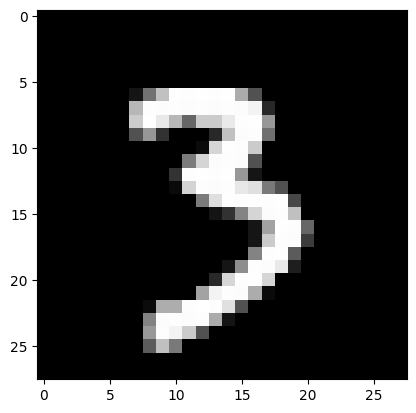

In [27]:
print("Prediction of number from our model :", np.argmax(our_model_output))
print()

print("The actual number : ")
print()
plt.imshow(x_test_og[sample_num],cmap = "gray")
plt.show()